In [20]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from os.path import join
from random import randint
from math import floor, ceil

In [5]:
n = 1000000
t = np.logspace(np.log10(10), np.log10(1000), n)

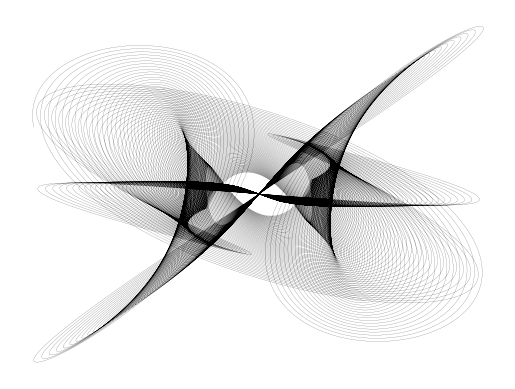

In [19]:
# the original from the book
A = [1, 1, 1.5, 1.5]
d = [.004, .001, .002, .0015]
f = [3, 1, 2, 2.5]

x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

plt.plot(x, y, 'k', linewidth=.1)
plt.axis('off')
plt.savefig('myfig.svg')


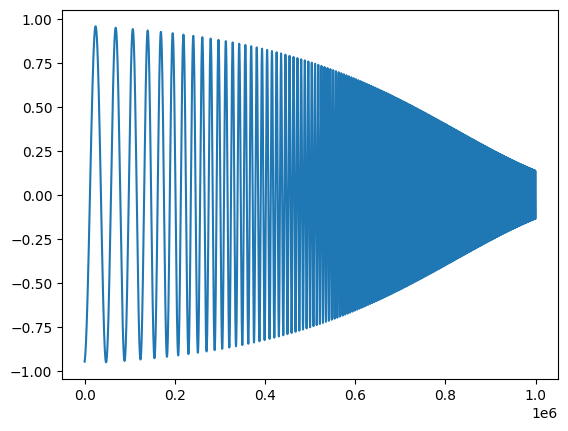

In [57]:
# one part of the X
plt.plot(np.sin(t*f[0])*np.exp(-d[0]*t))
plt.show()

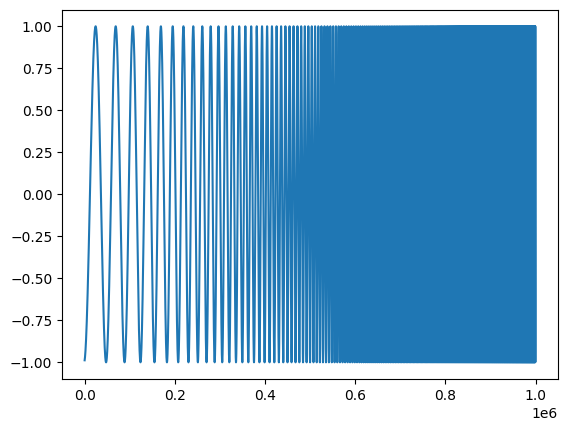

In [42]:
# if we delete the exponential part, the y axis won't shrink, but the frequency gets faster
plt.plot(np.sin(t*f[0]))
plt.show()

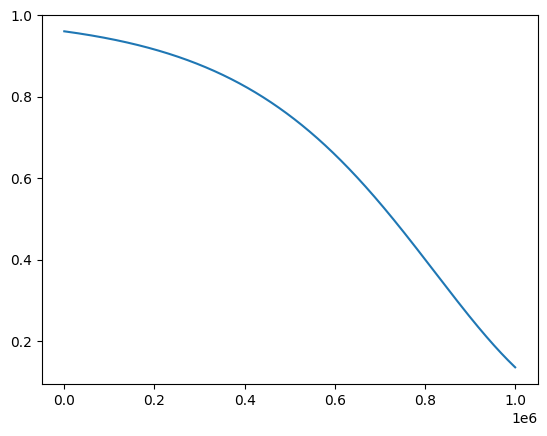

In [52]:
#the exponential part looks like this
plt.plot(np.exp(-d[0]*t))
plt.show()

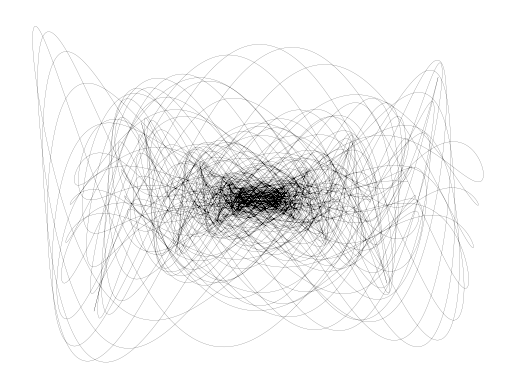

In [95]:
# the experiment from the book

A = [1, 1.5, 3.25, 2.65]
d = [.006, .005, .006, .006]
f = [1.5, 1.5, 2.85, 4.45]

x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

plt.plot(x, y, 'k', linewidth=.1)
plt.axis('off')
plt.savefig(f"{datetime.now().strftime(f'img/a_{A[0]}_{A[1]}_{A[2]}_{A[3]}-d_{d[0]}_{d[1]}_{d[2]}_{d[3]}-f_{f[0]}_{f[1]}_{f[2]}_{f[3]}')}.svg")

In [10]:
def hormonograph(A: list, d: list, f: list):
    n = 1000000
    t = np.logspace(np.log10(10), np.log10(1000), n)
    x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
    y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

    plt.plot(x, y, 'k', linewidth=.1)
    plt.axis('off')
    
    today_dir = f'img/{datetime.now().strftime("%y%m%d")}'
    os.makedirs(today_dir, exist_ok=True)
    
    plt.savefig(
        join(
            today_dir,
            f'a__{A[0]}_{A[1]}_{A[2]}_{A[3]}-d_{d[0]}__{d[1]}_{d[2]}_{d[3]}-f_{f[0]}_{f[1]}__{f[2]}_{f[3]}.svg'
        )
    )


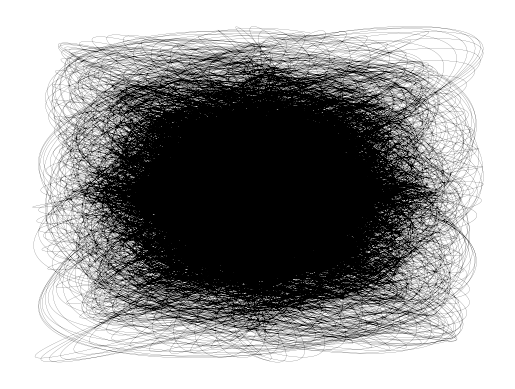

In [14]:
# testing the function
A = [100, 99.5, 89.25, 85.65]
d = [.003, .002, .003, .002]
f = [50, 33.5, 22.1, 33.45]

hormonograph(A, d, f)

In [24]:
def harmonograph_parameters(
    A_mean: float=None,
    d_mean: float=None,
    f_mean: float=None,
    a_sigma: float=0.1,
    d_sigma: float=0.1,
    f_sigma: float=0.1,
    A_diminisher: int=10,
    d_diminisher: int=1000,
    f_diminisher: int=10
    ) -> dict[list]:
    
    if not A_mean:
        A_mean = randint(1, 100)
    A_lower = int(A_mean * (1-a_sigma))
    A_upper = int(A_mean * (1+a_sigma))
    A = []
    for _ in range(4):
        A_parameter = randint(A_lower, A_upper)/A_diminisher
        A.append(A_parameter)
    
    if not d_mean:
        d_mean = randint(1,1000)
    d_lower = int(d_mean * (1-d_sigma))
    d_upper = int(d_mean * (1+d_sigma))
    d = []
    for _ in range(4):
        d_parameter = randint(d_lower, d_upper)/d_diminisher
        d.append(d_parameter)
    
    if not f_mean:
        f_mean = randint(1, 100)
    f_lower = int(f_mean * (1 - f_sigma))
    f_upper = int(f_mean * (1 + f_sigma))
    f = []
    for _ in range(4):
        f_parameter = randint(f_lower, f_upper)/f_diminisher
        f.append(f_parameter)
    
    hormonograph_params = {"A": A, "d": d, "f": f}
    
    return hormonograph_params

In [25]:
# tesing the hormonograph parameters maker
harmonograph_parameters(a_sigma=0.2, d_sigma=0.3, f_sigma=0.5)

{'A': [1.8, 1.8, 1.9, 2.1],
 'd': [0.343, 0.582, 0.544, 0.395],
 'f': [7.7, 10.3, 8.0, 11.3]}

Our current params:
{'A': [4.95, 4.9, 4.94, 4.96], 'd': [0.010191, 0.010082, 0.010015, 0.010071], 'f': [3.96, 3.92, 4.11, 4.11]}
Our current params:
{'A': [5.08, 4.9, 5.08, 4.96], 'd': [0.010184, 0.010092, 0.01019, 0.010169], 'f': [4.03, 4.03, 3.88, 3.93]}
Our current params:
{'A': [5.02, 5.02, 5.05, 5.08], 'd': [0.010072, 0.010142, 0.009895, 0.009803], 'f': [3.88, 4.03, 4.1, 3.95]}
Our current params:
{'A': [4.96, 5.04, 5.03, 4.91], 'd': [0.009884, 0.009995, 0.01004, 0.010109], 'f': [4.04, 4.06, 3.98, 3.94]}
Our current params:
{'A': [5.1, 5.07, 4.94, 4.93], 'd': [0.009815, 0.009902, 0.010192, 0.01004], 'f': [3.96, 3.88, 4.01, 4.08]}
Our current params:
{'A': [5.0, 5.0, 4.98, 5.0], 'd': [0.009861, 0.009872, 0.010028, 0.010097], 'f': [3.97, 3.98, 3.95, 4.04]}
Our current params:
{'A': [5.0, 5.03, 5.02, 5.05], 'd': [0.010104, 0.009813, 0.010166, 0.010011], 'f': [4.08, 4.12, 4.12, 3.93]}
Our current params:
{'A': [4.92, 4.9, 5.02, 4.96], 'd': [0.009961, 0.010025, 0.009891, 0.009899], 'f'

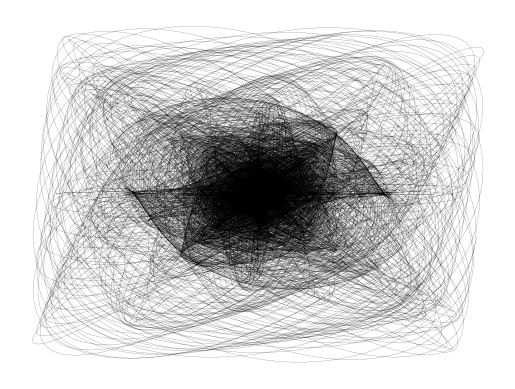

In [66]:
#tesing hormonograph-maker

for _ in range(10):
    h_params = harmonograph_parameters(
        A_mean=500,
        d_mean=10000,
        f_mean=400,
        a_sigma=0.02,
        d_sigma=0.02,
        f_sigma=0.03,
        A_diminisher=100,
        d_diminisher=1000000,
        f_diminisher=100
    )
    print(f"Our current params:\n{h_params}")

    hormonograph(
        h_params["A"],
        h_params["d"],
        h_params["f"]
    )

In [146]:
def half_hormonograph(A: list, d: list, f: list):
    n = 1000000
    t = np.logspace(np.log10(10), np.log10(5000), n)
    x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
    y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

    plt.plot(x, y, 'k', linewidth=.1)
    plt.axis('off')
    
    today_dir = f'img/{datetime.now().strftime("%y%m%d")}'
    os.makedirs(today_dir, exist_ok=True)
    
    plt.savefig(
        join(
            today_dir,
            f'a__{A[0]}_{A[1]}_{A[2]}_{A[3]}-d_{d[0]}__{d[1]}_{d[2]}_{d[3]}-f_{f[0]}_{f[1]}__{f[2]}_{f[3]}.svg'
        )
    )

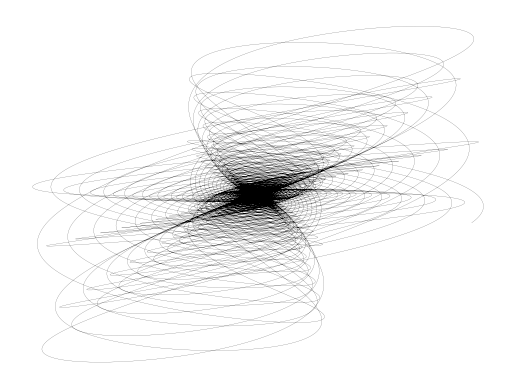

In [170]:
A = [1, 1.25, 1.5, 1.5]
d = [.003, .002, .003, .0025]
f = [0.7, 1.4, 0.5, 0.7]

half_hormonograph(A, d, f)

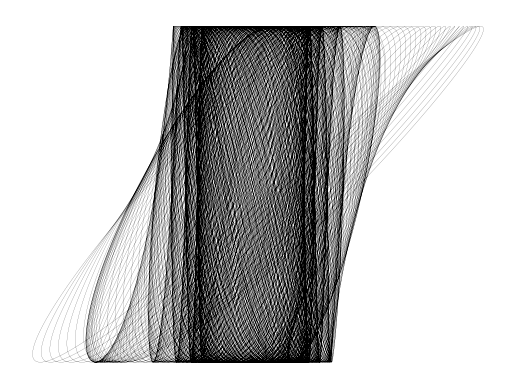

In [11]:
A = [10, 10, 10, 10]
d = [.0009, .007, 0, 0]
f = [2.01, 3, 3, 3]

hormonograph(A, d, f)

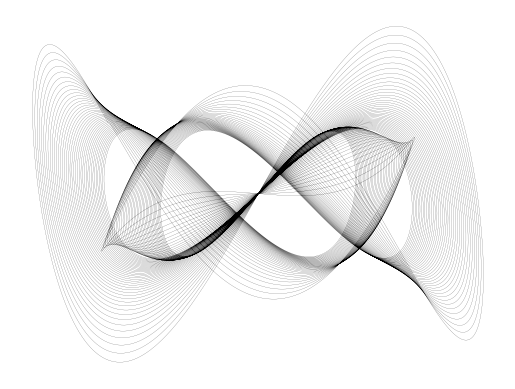

In [17]:
# the original from the book
A = [2, 0.5, 1.5, 1.5]
d = [.00088, .0004, .0007, .00855]
f = [1, 0.5, 2, 2.5]

x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

plt.plot(x, y, 'k', linewidth=.1)
plt.axis('off')
plt.savefig('myfig.svg')


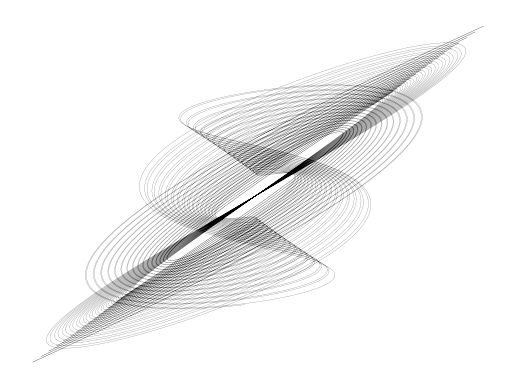

In [18]:
# the original from the book
A = [1.5, 0.75, 0.75, 2.5]
d = [.00088, .00008, .00007, .0007]
f = [0.9, 0.5, 0.9, 0.5]

x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

plt.plot(x, y, 'k', linewidth=.1)
plt.axis('off')
plt.savefig('myfig.svg')

In [124]:
def hormonograph(A: list, d: list, f: list):
    n = 100000
    t = np.logspace(np.log10(10), np.log10(100), n)
    # x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
    # y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)
    x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t)
    y = A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)

    plt.plot(x, y, 'k', linewidth=.1)
    plt.axis('off')
    
    today_dir = f'img/010123/{datetime.now().strftime("%y%m%d")}'
    os.makedirs(today_dir, exist_ok=True)
    
    plt.savefig(
        join(
            today_dir,
            f"a__{'_'.join([str(el) for el in A])}-d_{'_'.join([str(el) for el in d])}-f_{'_'.join([str(el) for el in f])}.svg"
        )
    )

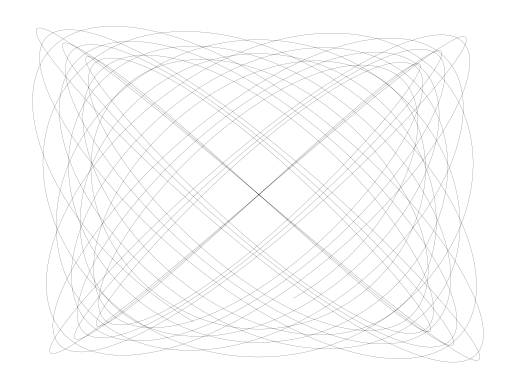

In [150]:
A = [1.5, 0.5]
d = [.004, .003]
f = [1.6,1.8]
hormonograph(A,d,f)